In [5]:
# load modules
import numpy as np
import pandas as pd
np.random.seed(1)

# get data
test = pd.read_csv(r'D:\DataSci_ML_practice\Neural_Network_data_practice\test.csv') 
train = pd.read_csv(r'D:\DataSci_ML_practice\Neural_Network_data_practice\train.csv')

In [11]:
# Exploratory Analysis
print(train.shape)
print(test.shape)
train.head()

# Training dataset > 42,000 rows and 785 columns
# Testing dataset > 28,000 rows and 784 columns

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Frequency')

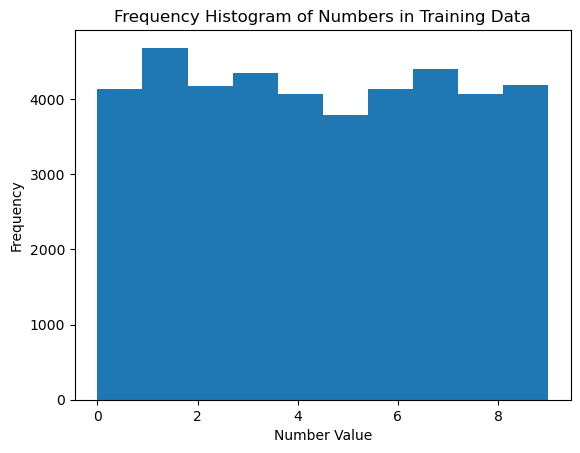

In [6]:
import matplotlib.pyplot as plt

# create a histogram, which shows the frequency of different values in the dataset.
plt.hist(train["label"])
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")

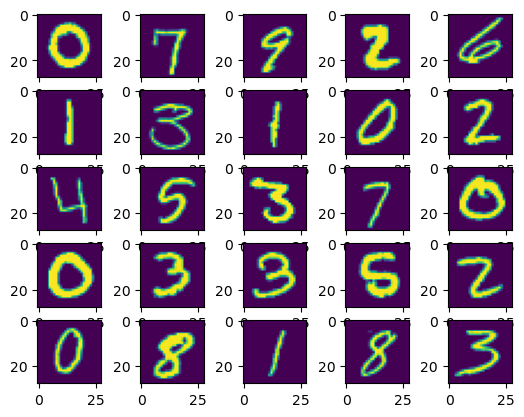

In [17]:
import math
# plot the first 25 digits in the training set. 
f, ax = plt.subplots(5, 5)
# plot some 4s as an example
for i in range(1,26):
    # 1024x1024x3 = 3,145,728 array of 8 bit unsigned integers

    # iloc > pandas > index-based selection
    # 1 to 785 rows
    data = train.iloc[i,1:785].values
    
    nrows, ncols = 28, 28
    grid = data.reshape((nrows, ncols))
    n=math.ceil(i/5)-1 #ceil > math.ceil(4.3) returns 5

    #repeats 5 times
    m=[0,1,2,3,4]*5

    # Accessing a specific subplot
    # ax[0, 0].imshow(grid) > First row, first column
    ax[m[i-1], n].imshow(grid)

# PCA stands for Principal Component Analysis

**There are many features in this data resulting in high dimensionality. PCA is used to compress the features into a small but informative set of features before using the data in a machine learning model. Data is normalized before PCA is applied. This is so the scale of the data does not throw of the PCA, and so the 0's are represented meaningfully. There is unequal variance in this data, and features with larger variance will influence the PCA more, creating bias. This is why the data is normalized.**


In [21]:
## normalize data ##
label_train=train['label']
train=train.drop('label', axis=1)

#normalize data
train = train / 255
test = test / 255
train['label'] = label_train

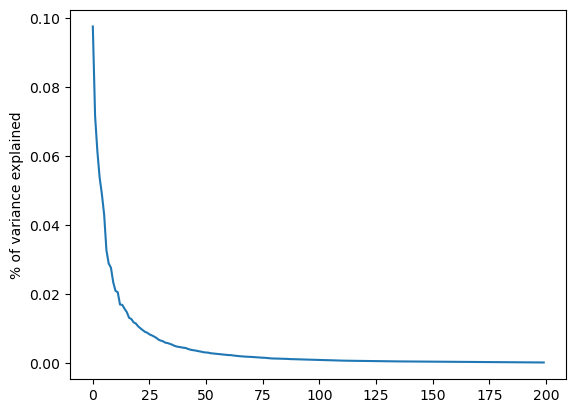

In [24]:
from sklearn import decomposition
from sklearn import datasets

## PCA decomposition
pca = decomposition.PCA(n_components=200) #Finds first 200 PCs
pca.fit(train.drop('label', axis=1))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
#plot reaches asymptote at around 50, which is optimal number of PCs to use. 

## PCA decomposition with optimal number of PCs
#decompose train data
pca = decomposition.PCA(n_components=50) #use first 3 PCs (update to 100 later)
pca.fit(train.drop('label', axis=1))
PCtrain = pd.DataFrame(pca.transform(train.drop('label', axis=1)))
PCtrain['label'] = train['label']

#decompose test data
#pca.fit(test)
PCtest = pd.DataFrame(pca.transform(test))